In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
test_data = pd.read_csv('C:\\Users\\Dell\\Desktop\\python books\\ML_Udemy\\Machine Learning A-Z (Codes and Datasets)\\Titanic Survivor Prediction/test.csv',index_col='PassengerId')

train_data = pd.read_csv('C:\\Users\\Dell\\Desktop\\python books\\ML_Udemy\\Machine Learning A-Z (Codes and Datasets)\\Titanic Survivor Prediction/train.csv',index_col='PassengerId')

In [77]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [79]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Derop the columns which woould not be helpful in prediction and modeling

In [80]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [81]:
train_data.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin'],inplace = True, axis = 1)

In [82]:
train_data.head()

,Survived,Pclass,Sex,Age,Embarked
PassengerId,,,,,
1,0,3,male,22.0,S
2,1,1,female,38.0,C
3,1,3,female,26.0,S
4,1,1,female,35.0,S
5,0,3,male,35.0,S


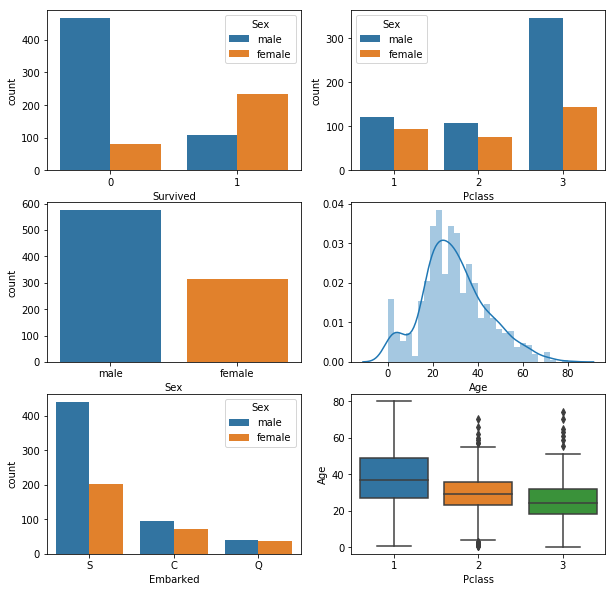

In [83]:
plt.figure(figsize = (10,10))

plt.subplot(3,2,1)
sns.countplot('Survived',data = train_data, hue = 'Sex')

plt.subplot(3,2,2)
sns.countplot('Pclass',data = train_data, hue = 'Sex')

plt.subplot(3,2,3)
sns.countplot('Sex',data = train_data)

plt.subplot(3,2,4)
sns.distplot(train_data['Age'],bins=30)

plt.subplot(3,2,5)
sns.countplot('Embarked',data = train_data, hue = 'Sex')


plt.subplot(3,2,6)
sns.boxplot('Pclass','Age',data = train_data)

Conclusions -
    - Most decesead were males
    - Most 3rd class were men
    - Most passesgers were males around (more than 250 from females)
    - Average age of passengers was aound 30 years
    - 3rd class is comprises of young people

## Fills values in empty columns

In [84]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
dtype: int64

In [85]:
def age_fill(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 28
        else:
            return 24
    else:
        return age

In [86]:
train_data['Age'] = train_data[['Age','Pclass']].apply(age_fill, axis = 1)

In [87]:
train_data.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
Embarked    2
dtype: int64

In [88]:
train_data.groupby('Embarked').count()

,Survived,Pclass,Sex,Age
Embarked,,,,
C,168,168,168,168
Q,77,77,77,77
S,644,644,644,644


In [89]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### Drop those rows which have nan value in  column

In [90]:
train_data.shape

(891, 5)

In [91]:
train_data = train_data.dropna(how='any',axis = 0)
train_data.shape

(889, 5)

In [92]:
sex = pd.get_dummies(train_data['Sex'], prefix='Sex')
embarked = pd.get_dummies(train_data['Embarked'], prefix='Embarked')
pclass = pd.get_dummies(train_data['Pclass'], prefix='Pclass')

In [95]:
train_data.head()

,Survived,Pclass,Sex,Age,Embarked
PassengerId,,,,,
1,0,3,male,22.0,S
2,1,1,female,38.0,C
3,1,3,female,26.0,S
4,1,1,female,35.0,S
5,0,3,male,35.0,S


In [96]:
train_data = pd.concat([train_data, sex, embarked, pclass], axis=1)

In [97]:
train_data.head()

,Survived,Pclass,Sex,Age,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,
1,0,3,male,22.0,S,0,1,0,0,1,0,0,1
2,1,1,female,38.0,C,1,0,1,0,0,1,0,0
3,1,3,female,26.0,S,1,0,0,0,1,0,0,1
4,1,1,female,35.0,S,1,0,0,0,1,1,0,0
5,0,3,male,35.0,S,0,1,0,0,1,0,0,1


In [98]:
train_data.drop(['Sex','Embarked','Pclass'],inplace = True, axis = 1)

In [99]:
train_data.head()

,Survived,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,
1,0,22.0,0,1,0,0,1,0,0,1
2,1,38.0,1,0,1,0,0,1,0,0
3,1,26.0,1,0,0,0,1,0,0,1
4,1,35.0,1,0,0,0,1,1,0,0
5,0,35.0,0,1,0,0,1,0,0,1


### Split the independent and dependent variable

In [100]:


X = train_data.drop('Survived', axis =1)
y = train_data['Survived']

In [102]:
X.head()

,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,
1,22.0,0,1,0,0,1,0,0,1
2,38.0,1,0,1,0,0,1,0,0
3,26.0,1,0,0,0,1,0,0,1
4,35.0,1,0,0,0,1,1,0,0
5,35.0,0,1,0,0,1,0,0,1


In [103]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [104]:
X.shape, y.shape

((889, 9), (889,))

### Split in training and test set

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=0)

In [107]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((622, 9), (267, 9), (622,), (267,))

## Check with different ML models

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [110]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Make Function to get report for different ML models

In [113]:
def get_report(model,X_train,y_train,X_test,y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)
    
    # Accuracy score
    acc_train = accuracy_score(y_train,y_pred_train)
    acc_test  = accuracy_score(y_test,y_pred_test)
    
    # f1 score 
    f1_score_train = f1_score(y_train,y_pred_train)
    f1_score_test = f1_score(y_test,y_pred_test)
    
    print('Accuracy Train = %0.2f'%acc_train)
    print('Accuracy Test = %0.2f'%acc_test)
    print('F1 Score Train = %0.2f'%f1_score_train)
    print('F1 Score Test = %0.2f'%f1_score_test)
    


In [114]:
get_report(model_logistic,X_train,y_train,X_test,y_test)

Accuracy Train = 0.81
Accuracy Test = 0.76
F1 Score Train = 0.73
F1 Score Test = 0.69


In [115]:
model_rf = RandomForestClassifier(n_estimators=10)
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [116]:
get_report(model_rf,X_train,y_train,X_test,y_test)

Accuracy Train = 0.92
Accuracy Test = 0.75
F1 Score Train = 0.88
F1 Score Test = 0.69


## Voting Classifier get best of all these models

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.
It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

Voting Classifier supports two types of votings.

Hard Voting: In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.
Soft Voting: In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier.

In [128]:
estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver='liblinear')))
estimator.append(('Rf',RandomForestClassifier(max_depth = 5, n_estimators=5)))

model_voting = VotingClassifier(estimators= estimator, voting = 'soft',weights=[2,1])
model_voting.fit(X_train,y_train)

VotingClassifier(estimators=[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)), ('Rf', Ran...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft',
         weights=[2, 1])

In [129]:
estimator

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
            tol=0.0001, verbose=0, warm_start=False)),
 ('Rf',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=5, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False))]

In [130]:
get_report(model_voting,X_train,y_train,X_test,y_test)

Accuracy Train = 0.84
Accuracy Test = 0.78
F1 Score Train = 0.76
F1 Score Test = 0.70


## Predicting Test data

In [131]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [132]:
test_data.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin'],inplace = True, axis = 1)

In [133]:
test_data.head()

,Pclass,Sex,Age,Embarked
PassengerId,,,,
892,3,male,34.5,Q
893,3,female,47.0,S
894,2,male,62.0,Q
895,3,male,27.0,S
896,3,female,22.0,S


In [134]:
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
Embarked     0
dtype: int64

In [135]:
test_data['Age'] = test_data[['Age','Pclass']].apply(age_fill, axis = 1)

In [136]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [137]:
sex = pd.get_dummies(test_data['Sex'], prefix='Sex')
embarked = pd.get_dummies(test_data['Embarked'], prefix='Embarked')
pclass = pd.get_dummies(test_data['Pclass'], prefix='Pclass')

In [138]:
test_data.head()

,Pclass,Sex,Age,Embarked
PassengerId,,,,
892,3,male,34.5,Q
893,3,female,47.0,S
894,2,male,62.0,Q
895,3,male,27.0,S
896,3,female,22.0,S


In [139]:
test_data = pd.concat([test_data, sex, embarked, pclass], axis=1)

In [140]:
test_data.head()

,Pclass,Sex,Age,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,
892,3,male,34.5,Q,0,1,0,1,0,0,0,1
893,3,female,47.0,S,1,0,0,0,1,0,0,1
894,2,male,62.0,Q,0,1,0,1,0,0,1,0
895,3,male,27.0,S,0,1,0,0,1,0,0,1
896,3,female,22.0,S,1,0,0,0,1,0,0,1


In [144]:
test_data.drop(['Sex','Embarked','Pclass'],axis = 1, inplace = True)

In [145]:
test_data.head()

,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,
892,34.5,0,1,0,1,0,0,0,1
893,47.0,1,0,0,0,1,0,0,1
894,62.0,0,1,0,1,0,0,1,0
895,27.0,0,1,0,0,1,0,0,1
896,22.0,1,0,0,0,1,0,0,1


In [146]:
ans_predictions = model_voting.predict(test_data)

ans_predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [147]:
test_data.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [148]:
final_submission = pd.DataFrame({'PassengerId':test_data.index,"Survived":ans_predictions })

In [149]:
final_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [152]:
final_submission.to_csv('final_submission.csv',index= False)